# RNN and LSTM time-series analysis
## This project uses LSTM to learn, process, and classify sequential data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/gdrive/MyDrive/dsdataset/image_dataset.zip" "/content"

In [ ]:
from zipfile import ZipFile

archive = ZipFile('/content/jena_climate_2009_2016.csv.zip')
archive.extractall('/content')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data =pd.read_csv("jena_climate_2009_2016.csv")

In [ ]:
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


#### this dataset has a ten minute interval. For the sake of this project I will use a one hour interval

In [ ]:
data=data[5::6]

In [ ]:
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [ ]:
data_df=data.copy()

In [ ]:
# converting the timestamp into 'data, month, year, hour, minute, and second' and using the conversion as the index
data.index = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


### Let us play with the 'T (degC)' feature(we name it temp)

In [ ]:
temp =data['T (degC)']
temp.head()

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
Name: T (degC), dtype: float64

<Axes: xlabel='Date Time'>

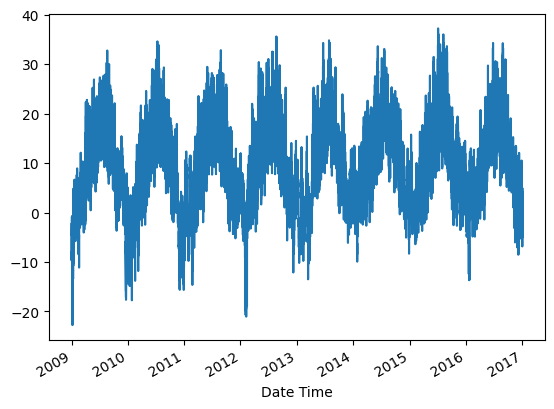

In [ ]:
temp.plot()

### We can make a few observation from the graph.
#### we notice that there is a yearly pattern with temperature rising during the middle of the year and falling towards the end of the year.

### Using LSTM requires that the previous data state



In [ ]:
# this is a function that creates the dependent and independent variable
def x_y_vals(data, window_size):
  data_np = data.to_numpy()
  x = []
  y = []
  for i in range(len(data_np)-window_size):
    row = [[a] for a in data_np[i:i+window_size]]
    x.append(row)
    label = data_np[i+window_size]
    y.append(label)
  return np.array(x), np.array(y)

In [ ]:
# the size of the windows will be 5. This means that the previous 5 temp values are necessary to predict the next value.
WINDOW_SIZE = 5
x, y = x_y_vals(temp, WINDOW_SIZE)
x.shape, y.shape

((70086, 5, 1), (70086,))

### Splitting the dataset into training, validation, and testing data

In [ ]:
x_train, y_train = x[:60000], y[:60000]   #training 60000 instances
x_val, y_val = x[60000:65000], y[60000:65000]   #validation 5000 instances
x_test, y_test = x[65000:], y[65000:]   #testing 5086 instances

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

## Model creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64,return_sequences=True, activation='relu'))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 50,449
Trainable params: 50,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# created a model checkpoint and compiled the model
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
1873/1875 [============================>.] - ETA: 0s - loss: 9.0854 - root_mean_squared_error: 3.0142

1875/1875 [==============================] - 27s 14ms/step - loss: 9.0791 - root_mean_squared_error: 3.0132 - val_loss: 0.7255 - val_root_mean_squared_error: 0.8518
Epoch 2/20
1874/1875 [============================>.] - ETA: 0s - loss: 1.8296 - root_mean_squared_error: 1.3526

1875/1875 [==============================] - 27s 15ms/step - loss: 1.8293 - root_mean_squared_error: 1.3525 - val_loss: 0.5670 - val_root_mean_squared_error: 0.7530
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9642 - root_mean_squared_error: 0.9820 - val_loss: 0.5889 - val_root_mean_squared_error: 0.7674
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7941 - root_mean_squared_error: 0.8911 - val_loss: 0.5902 - val_root_mean_squared_error: 0.7682
Epoch 5/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.7368 - root_mean_squared_error: 0.8583

1875/1875 [==============================] - 26s 14ms/step - loss: 0.7366 - root_mean_squared_error: 0.8582 - val_loss: 0.5347 - val_root_mean_squared_error: 0.7313
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7103 - root_mean_squared_error: 0.8428 - val_loss: 0.5415 - val_root_mean_squared_error: 0.7359
Epoch 7/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.6963 - root_mean_squared_error: 0.8345

1875/1875 [==============================] - 27s 14ms/step - loss: 0.6963 - root_mean_squared_error: 0.8345 - val_loss: 0.5166 - val_root_mean_squared_error: 0.7187
Epoch 8/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6913 - root_mean_squared_error: 0.8315 - val_loss: 0.5170 - val_root_mean_squared_error: 0.7190
Epoch 9/20
1875/1875 [==============================] - ETA: 0s - loss: 0.6813 - root_mean_squared_error: 0.8254

1875/1875 [==============================] - 27s 15ms/step - loss: 0.6813 - root_mean_squared_error: 0.8254 - val_loss: 0.4865 - val_root_mean_squared_error: 0.6975
Epoch 10/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6824 - root_mean_squared_error: 0.8261 - val_loss: 0.5044 - val_root_mean_squared_error: 0.7102
Epoch 11/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6732 - root_mean_squared_error: 0.8205 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7187
Epoch 12/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6702 - root_mean_squared_error: 0.8186 - val_loss: 0.4977 - val_root_mean_squared_error: 0.7055
Epoch 13/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6689 - root_mean_squared_error: 0.8179 - val_loss: 0.5425 - val_root_mean_squared_error: 0.7365
Epoch 14/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6657 - root_mean_squared_error: 0.8159 - val_l

1875/1875 [==============================] - 33s 18ms/step - loss: 0.6601 - root_mean_squared_error: 0.8125 - val_loss: 0.4864 - val_root_mean_squared_error: 0.6974
Epoch 19/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6561 - root_mean_squared_error: 0.8100 - val_loss: 0.5217 - val_root_mean_squared_error: 0.7223
Epoch 20/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6560 - root_mean_squared_error: 0.8099 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7065


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/')

### Test predictions

In [ ]:
test_predictions = model.predict(x_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actual_value':y_test})
test_results

159/159 [==============================] - 1s 4ms/step


,Test Predictions,Actual_value
0,14.271679,13.99
1,13.084297,13.46
2,12.742184,12.93
3,12.303496,12.43
4,11.838659,12.17
...,...,...
5081,-1.105061,-0.98
5082,-1.534418,-1.40
5083,-1.658814,-2.75
5084,-3.277427,-2.89


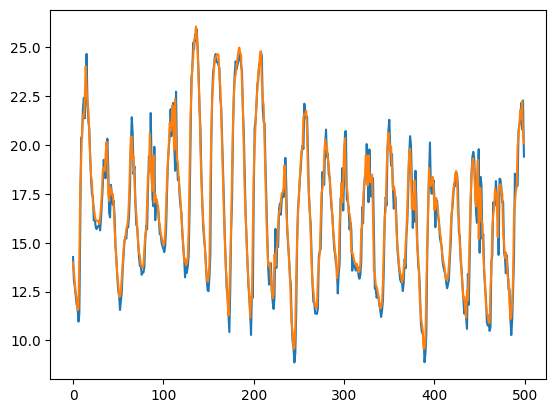

In [ ]:
plt.plot(test_results['Test Predictions'][:500])
plt.plot(test_results['Actual_value'][:500])

## The model makes predictions of the values of the temperature based on the previous values.

In [ ]:
# I want to compare the graphs of the predicted temp and the actual
predictions = model.predict(x).flatten()
results = pd.DataFrame(data={'Test Predictions':predictions, 'Actual_value':y})
results

2191/2191 [==============================] - 10s 5ms/step


,Test Predictions,Actual_value
0,-9.338164,-9.67
1,-9.080795,-9.17
2,-8.164627,-8.10
3,-6.595698,-7.66
4,-6.396386,-7.04
...,...,...
70081,-1.105061,-0.98
70082,-1.534418,-1.40
70083,-1.658813,-2.75
70084,-3.277427,-2.89


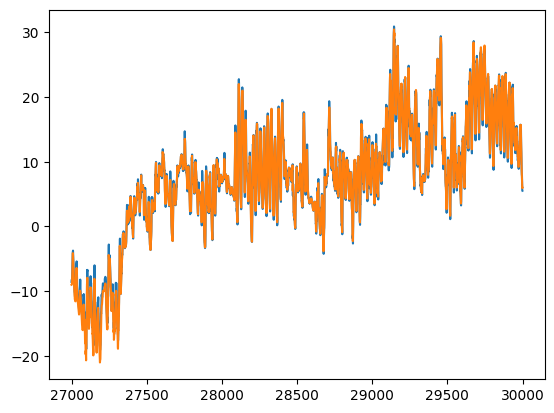

In [ ]:
plt.plot(results['Test Predictions'][27000:30000])
plt.plot(results['Actual_value'][27000:30000])